In [3]:
import sys
import json
import os 

import numpy as np
import pandas as pd
# from sklearn.metrics import accuracy_score, f1_score
# from scipy.stats import pearsonr
# proj_dir = "/ix1/xli/bkb45/joey_files/creative_bench/"
# sys.path.insert(1, proj_dir + '../src/utils/')

# from helpers import load_json

import json

def load_json(filename):
    """
    Load a JSON file given a filename
    If the file doesn't exist, then return an empty dictionary instead
    """
    try:
        with open(filename, 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        return {}

In [2]:
# !pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 21.1 MB/s eta 0:00:00


# 1. Evaluator Check

In [20]:
curr_dir = '../'

aut_gpt4o_eval = load_json(curr_dir + 'data/output/aut_evaluator_check/gpt4o/eval_output_cleaned.json')
aut_qwen32_eval = load_json(curr_dir + 'data/output/aut_evaluator_check/qwen_72b/eval_output_cleaned.json')

In [9]:
all_gpt_pred = []
all_qwen_pred = []
for i in range(len(aut_gpt4o_eval)):
    gpt_pred = aut_gpt4o_eval[i]['cleaned_output']
    qwen_pred = aut_qwen32_eval[i]['cleaned_output']

    tmp_pred = {}
    for use, score in aut_qwen32_eval[i]['cleaned_output']:
        tmp_pred[use] = [score]
    for use, score in aut_gpt4o_eval[i]['cleaned_output']:
        if use not in tmp_pred: continue 
        tmp_pred[use].append(score)

    for use in tmp_pred:
        if len(tmp_pred[use]) < 2: continue
        all_gpt_pred.append(tmp_pred[use][1])
        all_qwen_pred.append(tmp_pred[use][0])

In [10]:
len(all_gpt_pred)

552

In [12]:
len(all_qwen_pred)

552

In [15]:
pearsonr(all_gpt_pred, all_qwen_pred).statistic

0.5969507092217958

In [17]:
pearsonr(all_gpt_pred, all_qwen_pred).pvalue

1.357916913986314e-54

In [19]:
import seaborn as sns

In [24]:
tmp_data = pd.DataFrame([
    {
        'model': 'gpt',
        'pred': i
    }
    for i in all_gpt_pred
] + [
    {
        'model': 'qwen',
        'pred': i
    }
    for i in all_qwen_pred
])

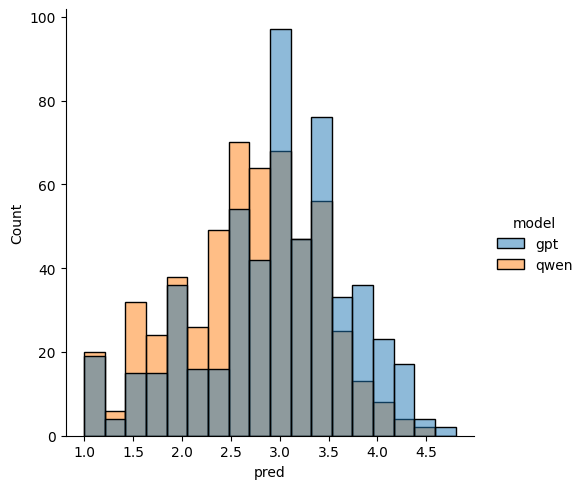

In [25]:
sns.displot(data = tmp_data, x = 'pred', hue = 'model')

<Axes: >

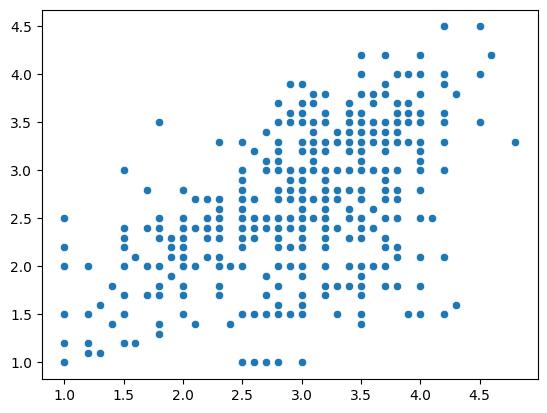

In [28]:
sns.scatterplot(x = all_gpt_pred, y = all_qwen_pred)

# 2. Model Performances

In [4]:
proj_dir = "/ix1/xli/bkb45/joey_files/creative_bench"

In [14]:
batch_id = 'aut_tmp_var'
batch_id = 'aut_v1_0'
exclude_lst = [
    'gemini_2_pro',
    '__MACOSX'
]

output_dir = '{}/{}/{}/'.format(proj_dir, "data/output/", batch_id)
model_lst = [m for m in os.listdir(output_dir) if os.path.isdir(output_dir + m) and m not in exclude_lst]

model_lst

['olmo_13b_dpo',
 'claude_37_sonnet',
 'deepseek_llama_70b',
 'qwen_72b_instruct',
 'qwen_7b_instruct',
 'mistral_7b_instr',
 'olmo_13b',
 'llama3_8b_instr',
 'gemini_2_flash',
 'gpt_4.1',
 'deepseek_r1',
 'deepseek_v3',
 'mixtral_8x7b',
 'qwen_32b_instruct',
 'olmo_7b',
 'llama3_70b_instruct',
 'deepseek_qwen_32b',
 'mistral_small_24b',
 'claude_3_haiku',
 'olmo_13b_sft',
 'gpt_4.1_mini',
 'deepseek_qwen_7b']

In [15]:
# # result_dfs = []
# # model_lst = [
# #     'olmo_13b_dpo',
# #     'olmo_13b_sft'
# # ]
# # batch_id = "aut_tmp_var"
# skip_lst = [] #['qwen_32b_instruct']
# for model in model_lst:
#     if model in skip_lst: continue
#     inference_results = load_json(
#         '/ix1/xli/bkb45/joey_files/creative_bench/data/output/{}/{}/inference_output.json'.format(
#             batch_id, model
#         )
#     )
#     print(len(inference_results))

In [16]:
result_dfs = []
skip_lst = [] #['qwen_32b_instruct']
for model in model_lst:
    if model in skip_lst: continue
    tmp_df = pd.read_csv(output_dir + model + '/eval_report.csv')
    tmp_df['model'] = model
    result_dfs.append(tmp_df)
combined_df = pd.concat(result_dfs)
# combined_df

In [17]:
combined_df.query('setting not in ["nc", "nn"]').groupby("model").agg("max").sort_values(by = 'avg')

,setting,avg,std
model,,,
olmo_13b_sft,bsrdel,2.92,0.65
deepseek_llama_70b,bsrdel,2.99,0.60
deepseek_qwen_32b,bsrdel,3.00,0.62
qwen_7b_instruct,bsrdel,3.01,0.74
mistral_small_24b,bsrdel,3.02,0.56
deepseek_qwen_7b,bsrdel,3.11,0.89
olmo_7b,bsrdel,3.12,0.41
llama3_8b_instr,bsrdel,3.16,0.74
qwen_72b_instruct,bsrde,3.18,0.45


In [18]:
all_avg = {}
all_std = {}
for i, row in combined_df.iterrows():
    if row['model'] not in all_avg:
        all_avg[row['model']] = {
            'model': row['model'],
            row['setting']: row['avg']
        }
        all_std[row['model']] = {
            'model': row['model'],
            row['setting']: row['std']
        }
    else:
        all_avg[row['model']][row['setting']] = row['avg']
        all_std[row['model']][row['setting']] = row['std']

In [19]:
summary_aut_df = pd.DataFrame(list(all_avg.values()))

def norm_aut(score):
    return round((score -1 ) / 4, 4)

def get_best(row):
    tmp_scores = []
    for col in row.index:
        if 'bs' in col:
            tmp_scores.append(row[col])
    return norm_aut(max(tmp_scores))

summary_aut_df['bs_best'] = summary_aut_df.apply(get_best, axis = 1)
summary_aut_df['nc'] = summary_aut_df['nc'].apply(lambda x: norm_aut(x))
summary_aut_df['nn'] = summary_aut_df['nn'].apply(lambda x: norm_aut(x))
summary_aut_df

,model,nc,nn,bs,bsr,bsrd,bsrde,bsrdel,bs_best
0,olmo_13b_dpo,0.4575,0.2600,3.08,3.19,3.37,3.35,3.30,0.5925
1,claude_37_sonnet,0.5150,0.3075,3.04,3.13,3.40,3.37,3.64,0.6600
2,deepseek_llama_70b,0.4325,0.3225,2.99,2.73,2.81,2.80,2.95,0.4975
3,qwen_72b_instruct,0.4875,0.3675,2.94,3.18,NaN,2.55,NaN,0.5450
4,qwen_7b_instruct,0.4450,0.3550,3.00,2.85,2.95,2.87,3.01,0.5025
5,mistral_7b_instr,0.4950,0.3175,3.13,3.43,3.59,3.52,3.10,0.6475
6,olmo_13b,0.4425,0.3600,3.00,3.13,3.35,3.28,3.45,0.6125
7,llama3_8b_instr,0.4925,0.2975,2.95,3.16,2.86,3.03,3.10,0.5400
8,gemini_2_flash,0.5025,0.3100,3.18,3.24,3.43,3.26,3.40,0.6075
9,gpt_4.1,0.5000,0.2775,2.72,3.11,3.22,3.25,3.14,0.5625


In [20]:
summary_aut_df.to_csv('../results/summary_{}.csv'.format(batch_id), index = False)
# pd.DataFrame(list(all_std.values())).to_csv(output_dir + 'std_summary.csv', index = False)